# 🔐 HITL-асистент для дешифрування шифру УПА

Цей блокнот реалізує поетапний підхід HITL (Human-in-the-Loop) для дешифрування
історичного шифру УПА. На початковому етапі проводиться аналітика текстів:
- Маркування шифртексту
- Частотний аналіз букв референтного тексту
- Побудова теплових карт для квадрата 10×10
- Порівняння розподілів символів


In [1]:
# === БЛОК 1: комірка з кодом ===
# імпорти

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter


In [2]:
# === БЛОК 2: комірка з кодом ===
# Шифртекст (біграми)

cipher_text = '''
38 29 41 45 28 08 98 87 32 15 15 58 66 48 54 77 54 22 99 38
44 38 20 70 11 95 58 95 25 11 35 46 04 28 97 32 08 15 52 38
72 38 15 98 48 29 22 11 29 58 12 24 28 22 28 98 38 29 65 58
61 38 20 87 54 48 94 98 68 08 62 82 85 18 11 61 32 31 29 52
38 44 44 32 11 74 03 38 34 68 11 59 28 60 12 38 94 41 21 62
04 58 94 38 66 98 94 31 27 94 28 82 00 94 87 85 77 19 93 11
38 15 98 15 00 32 11 59 11 77 18 44 04 22 66 38 03 76 28 88
28 24 11 48 72 41 43 48 44 28 64 06 89 48 11 77 67
'''


In [3]:
# === БЛОК 3: комірка з кодом ===
# Референтний текст (для частотного аналізу)

reference_text = """
ЯК НЕ МОЖНА СПИНИТИ РІЧКУ ЩО ЗЛАМАВШИ КРИГУ НА ВЕСНІ БУРХЛИВО НЕСЕТЬСЯ ДО МОРЯ
ТАК НЕ МОЖНА СПИНИТИ НАЦІЇ ЩО ЛАМАЄ СВОЇ КАЙДАНИ ПРОКИНУВШИСЬ ДО ЖИТТЯ
НАША НАЦІЯ СТУПИЛА НА НОВИЙ ШЛЯХ ЖИТТЯ А МИ МУСИМО СТАТИ НА ЇЇ ЧОЛІ ЩОБ ВЕСТИ ДО ЗДІЙСНЕННЯ ВЕЛИКОГО ІДЕАЛУ
АЛЕ МИ МУСИМО ПАМЯТАТИ ЩО МИ ТІЛЬКИ ОПОВІЩУЄМО ЙОГО СИЛУ МИ ТІЛЬКИ ЙОГО ПІСЛАНЦІ
ЦЕЙ ВЕЛИКИЙ УВЕСЬ НАРОД УКРАЇНСЬКИЙ. МИ РОЗУМІЄМО, ЩО БОРОТЬБА БУДЕ ЛЮТА Й ДОВГА, ЩО ВОРОГ БЕЗПОЩАДНИЙ І ДУЖИЙ.
АЛЕ МИ РОЗУМІЄМО Й ТЕ, ЩО ЦЕ ВЖЕ ОСТАННЯ БОРОТЬБА, ЩО ПОТІМ УЖЕ НІКОЛИ НЕ НАСТАНЕ СЛУШНИЙ ЧАС ДО НОВОЇ БОРОТЬБИ.
НІЧ БУЛА ДОВГА, АЛЕ РАНОК НАБЛИЗИВСЯ І МИ НЕ ПОСТУПИМО, ЩОБ ПРОМІННЯ СВОБОДИ УСІХ НАЦІЙ ЗАБЛИЩАЛО
НА НАШИХ РАБСЬКИХ КАЙДАНАХ: МИ РОЗІБЄМО ЇХ ДО СХІД СОНЦЯ СВОБОДИ. МИ ВОСТАННЄ ВИХОДИМО НА ІСТОРИЧНУ АРЕНУ,
І АБО ПОБОРЕМО, АБО ВМРЕМО.
"""


In [4]:
# === Словник семантичних патернів ===

semantic_patterns = [
    "УКРАЇН", "НАЦІ", "НАРОД", "ДЕРЖАВ", "НЕЗАЛЕЖН", "СВОБОД", "ВОЛ", "КРАЙ", "ЗЕМЛ",
    "ЛЮБОВ", "ВІРА", "ЧЕСТЬ", "ГІДНІСТЬ", "СЕРЦ", "ДУША", "СПРАВЕДЛИВ",
    "БОРОТЬБ", "СИЛ", "ГОЛОС", "СТІЙКІСТЬ", "НЕСКОРЕН",
    "НЕЗЛАМНІСТЬ", "ВІЛЬНІ", "СВІТЛО", "ШЛЯХ", "ДОКИ", "ВОЛЮ"
]


Довжини тексту: 157 біграм 



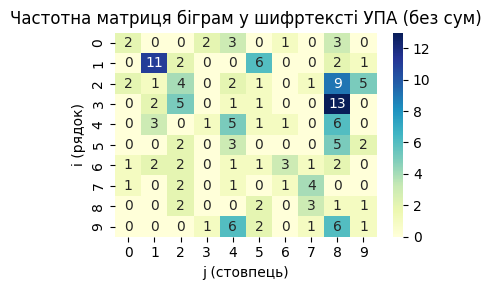


 Повна частотна матриця з підсумками:


,0,1,2,3,4,5,6,7,8,9,Σ
0,2,0,0,2,3,0,1,0,3,0,11
1,0,11,2,0,0,6,0,0,2,1,22
2,2,1,4,0,2,1,0,1,9,5,25
3,0,2,5,0,1,1,0,0,13,0,22
4,0,3,0,1,5,1,1,0,6,0,17
5,0,0,2,0,3,0,0,0,5,2,12
6,1,2,2,0,1,1,3,1,2,0,13
7,1,0,2,0,1,0,1,4,0,0,9
8,0,0,2,0,0,2,0,3,1,1,9
9,0,0,0,1,6,2,0,1,6,1,17


<Figure size 640x480 with 0 Axes>

In [5]:
# === БЛОК 5: комірка з кодом ===
import os

# Створити директорію "results", якщо її ще немає
os.makedirs("results", exist_ok=True)

# Перетворення на список біграм
cipher_bigrams = cipher_text.strip().split()
cipher_bigrams = [int(bigram) for bigram in cipher_bigrams]

print("Довжини тексту:", len(cipher_bigrams), 'біграм \n')

# Створення основної 10×10 матриці частот
freq_matrix = np.zeros((10, 10), dtype=int)

for bg in cipher_bigrams:
    i, j = bg // 10, bg % 10
    if 0 <= i < 10 and 0 <= j < 10:
        freq_matrix[i][j] += 1

# Обчислення сум по рядках і стовпцях
row_sums = freq_matrix.sum(axis=1)
col_sums = freq_matrix.sum(axis=0)

# Розширення матриці з сумами
freq_with_sums = np.zeros((11, 11), dtype=int)
freq_with_sums[:10, :10] = freq_matrix
freq_with_sums[:10, 10] = row_sums       # суми рядків
freq_with_sums[10, :10] = col_sums       # суми стовпців
freq_with_sums[10, 10] = freq_matrix.sum()

# Побудова теплової карти (без сум)
plt.figure(figsize=(4, 3))
sns.heatmap(freq_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)],
            cbar=True)

plt.title("Частотна матриця біграм у шифртексті УПА (без сум)")
plt.xlabel("j (стовпець)")
plt.ylabel("i (рядок)")
plt.tight_layout()
plt.show()

plt.savefig("results/heatmap_cipher_bigrams.png", dpi=300)

# Вивід повної таблиці із сумами
df = pd.DataFrame(freq_with_sums,
                  index=[str(i) for i in range(10)] + ['Σ'],
                  columns=[str(i) for i in range(10)] + ['Σ'])

print("\n Повна частотна матриця з підсумками:")
display(df)


In [6]:
# === БЛОК 6: комірка з кодом ===
# Визначення опорних стовпців

import math
from collections import Counter

# Функція для ранжування стовпців
def rank_columns(bigrams):
    column_scores = []
    for col in range(10):
        # Витягуємо всі i (рядки), де j (стовпець) == col
        col_bigrams = [bg // 10 for bg in bigrams if bg % 10 == col]
        count = len(col_bigrams)
        if count == 0:
            score = 0
        else:
            freqs = Counter(col_bigrams)
            max_freq = max(freqs.values())
            num_unique = len(freqs)
            density = count / len(cipher_bigrams)
            score = max_freq * math.log(num_unique + 1) * density
        column_scores.append((col, score))

    # Сортуємо за спаданням оцінки
    column_scores.sort(key=lambda x: x[1], reverse=True)
    return column_scores

scores = rank_columns(cipher_bigrams)

# Виведення результату
print("Ранжування стовпців за метрикою (max_freq × log(num_unique + 1) × density):")
for col, score in scores:
    print(f"Стовпець {col}: оцінка = {score:.4f}")

top_cols = [col for col, _ in scores[:4]]  # Топ-3 за частотою
print("\nОпорні стовпці:", top_cols)


Ранжування стовпців за метрикою (max_freq × log(num_unique + 1) × density):
Стовпець 8: оцінка = 8.9610
Стовпець 1: оцінка = 2.3852
Стовпець 4: оцінка = 1.8473
Стовпець 2: оцінка = 1.2583
Стовпець 5: оцінка = 1.1126
Стовпець 9: оцінка = 0.5706
Стовпець 7: оцінка = 0.4565
Стовпець 6: оцінка = 0.1845
Стовпець 0: оцінка = 0.1230
Стовпець 3: оцінка = 0.0706

Опорні стовпці: [8, 1, 4, 2]


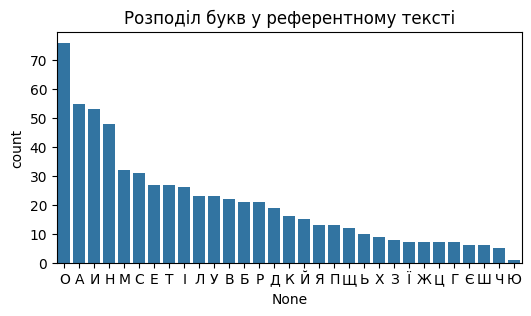

In [7]:
# === БЛОК 7: комірка з кодом ===
# Рахуємо частоти букв у референтному тексті
letters_only = [ch.upper() for ch in reference_text if ch.isalpha()]
freq_ref = Counter(letters_only)

# Таблиця частот
df_ref = pd.DataFrame.from_dict(freq_ref, orient='index', columns=['count']).sort_values(by='count', ascending=False)

# Візуалізація
plt.figure(figsize=(6,3))
sns.barplot(x=df_ref.index, y=df_ref['count'])
plt.title("Розподіл букв у референтному тексті")
plt.show()


In [20]:
# === БЛОК 8: комірка з кодом ===
#  utils.py — допоміжні функції

import itertools
from collections import defaultdict
from collections import Counter

UKRAINIAN_ALPHABET = list("АБВГҐДЕЄЖЗИІЇЙКЛМНОПРСТУФХЦЧШЩЬЮЯ")

# Побудова частотного профілю з еталонного тексту
def build_letter_frequency(text):
    text = [c for c in text.upper() if c in UKRAINIAN_ALPHABET]
    counter = Counter(text)
    total = sum(counter.values())
    freq = {char: count / total for char, count in counter.items()}
    return freq

# Створення порожньої таблиці 10x10 з None
def create_empty_square():
    return [[None for _ in range(10)] for _ in range(10)]

# Вставка колонки у квадрат за заданий номер стовпця
def insert_column(square, column_idx, column_values):
    for row in range(10):
        square[row][column_idx] = column_values[row]
    return square

# Витягує всі біграми, що відповідають певному стовпцю
def extract_column_bigrams(bigrams, column_idx):
    return [bg // 10 for bg in bigrams if bg % 10 == column_idx]

# Пошук всіх можливих варіантів 10-буквених колонок
def generate_column_variants(frequency_profile, top_k=660):
    all_letters = sorted(frequency_profile.items(), key=lambda x: -x[1])
    candidates = [l for l, _ in all_letters]

    variants = []
    for perm in itertools.permutations(candidates, 10):
        variants.append(perm)
        if len(variants) >= top_k:
            break
    return variants

# Часткове дешифрування тексту через квадрат
def partial_decrypt(cipher_bigrams, square):
    decrypted = []
    for bg in cipher_bigrams:
        i, j = bg // 10, bg % 10
        try:
            letter = square[i][j]
            decrypted.append(letter if letter else '_')
        except IndexError:
            decrypted.append('_')
    return ''.join(decrypted)

# Пошук входжень слів зі словника у частково розшифрованому тексті
def count_known_words(decrypted_text, standard_words):
    count = 0
    for word in standard_words:
        if word in decrypted_text:
            count += 1
    return count


In [36]:
# === БЛОК 9: комірка з кодом ===
#  Каскадний перебір опорних стовпців з параметрами

# === Параметри каскадного перебору ===
column_order = [8, 4, 2]         # порядок опорних стовпців (змінюйте як треба)
top_k_per_step = [20, 10, 5]     # скільки варіантів зберігати на кожному кроці

# === Каскадне дешифрування ===
from copy import deepcopy

def cascade_column_selection(column_order, top_k_per_step, all_generated_columns, cipher_bigrams, reference_distribution):
    """
    Пошук найкращих комбінацій колонок у заданому порядку з обмеженням на кількість варіантів (каскадний перебір).
    """
    current_candidates = [({}, 0)]  # список кортежів: (поточна_мапа_колонок, відстань)

    for step, col in enumerate(column_order):
        next_candidates = []
        top_k = top_k_per_step[step]

        variants = all_generated_columns[col]
        print(f"⬇️ Варіанти для стовпця {col}, перші 3:", variants[:3])

        print(f"\n▶️ Крок {step + 1}: Стовпець {col}, {len(variants)} варіантів, топ-{top_k} пройдуть далі.")

        for mapping, _ in current_candidates:
            for variant in variants:
                new_mapping = deepcopy(mapping)
                new_mapping[col] = variant

                decrypted = decrypt_multiple_columns(new_mapping, cipher_bigrams)
                dist = compute_distance(decrypted, reference_distribution)

                next_candidates.append((new_mapping, dist))

        # Відібрати top_k найкращих за метрикою
        next_candidates = sorted(next_candidates, key=lambda x: x[1])[:top_k]
        current_candidates = next_candidates

    print(f"\n✅ Завершено: залишилось {len(current_candidates)} найкращих комбінацій.")
    return current_candidates


In [32]:
# === Створення варіантів для опорних стовпців ===
import itertools

def generate_column_variants(frequency_profile, top_k=660):
    all_letters = sorted(frequency_profile.items(), key=lambda x: -x[1])
    candidates = [char for char, _ in all_letters]

    variants = []
    for perm in itertools.permutations(candidates, 10):
        variants.append(perm)
        if len(variants) >= top_k:
            break
    return variants

# === Створення словника з варіантами для кожного опорного стовпця ===
all_generated_columns = {
    8: generate_column_variants(frequency_profile=freq_ref, top_k=660),
    4: generate_column_variants(frequency_profile=freq_ref, top_k=660),
    2: generate_column_variants(frequency_profile=freq_ref, top_k=660),
}


In [37]:
# === БЛОК 11: комірка з кодом ===
#  Функція дешифрування тексту з фрагментарною таблицею

# === Дешифрування біграм з частково відомим квадратом ===
def decrypt_multiple_columns(col_mappings, cipher_bigrams):
    table = [['_' for _ in range(10)] for _ in range(10)]

    for col_index, letters in col_mappings.items():
        for row_index, letter in enumerate(letters):
            table[row_index][col_index] = letter

    # Побудова дешифрованого тексту
    decrypted_text = ''
    for bg in cipher_bigrams:
        i, j = divmod(bg, 10)
        decrypted_text += table[i][j]

    return decrypted_text


In [38]:
# === БЛОК 12: комірка з кодом ===
#  Обчислення відстані до референтного розподілу

# === Відстань між частотами дешифрованого та референтного текстів ===
def compute_distance(text, reference_freq):
    from collections import Counter
    import math

    filtered_text = [c for c in text if c in reference_freq]
    text_freq = Counter(filtered_text)

    all_letters = set(reference_freq.keys()).union(text_freq.keys())

    ref_total = sum(reference_freq.values())
    txt_total = sum(text_freq.values())

    distance = 0
    for char in all_letters:
        f1 = reference_freq.get(char, 0) / ref_total
        f2 = text_freq.get(char, 0) / txt_total
        distance += abs(f1 - f2)

    return distance


In [39]:
# === БЛОК 13: комірка з кодом ===
# Запуск перебору

final_candidates = cascade_column_selection(
    column_order=[8, 4, 2],
    top_k_per_step=[20, 10, 5],
    all_generated_columns=all_generated_columns,
    cipher_bigrams=cipher_bigrams,
    reference_distribution=freq_ref
)


⬇️ Варіанти для стовпця 8, перші 3: [('О', 'А', 'И', 'Н', 'М', 'С', 'Е', 'Т', 'І', 'У'), ('О', 'А', 'И', 'Н', 'М', 'С', 'Е', 'Т', 'І', 'Л'), ('О', 'А', 'И', 'Н', 'М', 'С', 'Е', 'Т', 'І', 'В')]

▶️ Крок 1: Стовпець 8, 660 варіантів, топ-20 пройдуть далі.
⬇️ Варіанти для стовпця 4, перші 3: [('О', 'А', 'И', 'Н', 'М', 'С', 'Е', 'Т', 'І', 'У'), ('О', 'А', 'И', 'Н', 'М', 'С', 'Е', 'Т', 'І', 'Л'), ('О', 'А', 'И', 'Н', 'М', 'С', 'Е', 'Т', 'І', 'В')]

▶️ Крок 2: Стовпець 4, 660 варіантів, топ-10 пройдуть далі.
⬇️ Варіанти для стовпця 2, перші 3: [('О', 'А', 'И', 'Н', 'М', 'С', 'Е', 'Т', 'І', 'У'), ('О', 'А', 'И', 'Н', 'М', 'С', 'Е', 'Т', 'І', 'Л'), ('О', 'А', 'И', 'Н', 'М', 'С', 'Е', 'Т', 'І', 'В')]

▶️ Крок 3: Стовпець 2, 660 варіантів, топ-5 пройдуть далі.

✅ Завершено: залишилось 5 найкращих комбінацій.


In [30]:
# === БЛОК 14: комірка з кодом ===
# Показати результати дешифрування для топ-5 кандидатів
for idx, (mapping, score) in enumerate(final_candidates):
    print(f"\n🔢 ВАРІАНТ {idx+1}, ВІДСТАНЬ = {score:.4f}")

    # Створити порожній квадрат
    square = create_empty_square()

    # Вставити усі стовпці зі словника mapping
    for col_idx, col_data in mapping.items():
        insert_column(square, col_idx, col_data)

    # Розшифрувати текст
    decrypted_text = partial_decrypt(cipher_bigrams, square)

    # Показати перші 400 символів розшифровки
    print(decrypted_text[:400])



🔢 ВАРІАНТ 1, ВІДСТАНЬ = 0.8902
Н___ИОУ_Н__С_МС_СИ_НМН____С_____ОИ_НО_СНІН_УМ_И__САИИИИУН__С_Н__СМТУЕОЕЛ_А__Н__СНММН_І_ННЕ__И_АНТ__ЕОСТН_УТ__ТИЛ_Т______Н_У__Н____АМОИ_Н__ИЙИИ_МІ__ММИЕ__М___

🔢 ВАРІАНТ 2, ВІДСТАНЬ = 0.8902
Н___ИОУ_Н__С_МС_СИ_НМН____С_____ОИ_НО_СНІН_УМ_И__САИИИИУН__С_Н__СМТУЕОЕЛ_А__Н__СНММН_І_ННЕ__И_АНТ__ЕОСТН_УТ__ТИЛ_Т______Н_У__Н____АМОИ_Н__ИЙИИ_МІ__ММИЕ__М___

🔢 ВАРІАНТ 3, ВІДСТАНЬ = 0.8902
Н___ИОУ_Н__С_МС_СИ_НМН____С_____ОИ_НО_СНІН_УМ_И__САИИИИУН__С_Н__СМТУЕОЕЛ_А__Н__СНММН_І_ННЕ__И_АНТ__ЕОСТН_УТ__ТИЛ_Т______Н_У__Н____АМОИ_Н__ИЙИИ_МІ__ММИЕ__М___

🔢 ВАРІАНТ 4, ВІДСТАНЬ = 0.8902
Н___ИОУ_Н__С_МС_СИ_НМН____С_____ОИ_НО_СНІН_УМ_И__САИИИИУН__С_Н__СМТУЕОЕЛ_А__Н__СНММН_І_ННЕ__И_АНТ__ЕОСТН_УТ__ТИЛ_Т______Н_У__Н____АМОИ_Н__ИЙИИ_МІ__ММИЕ__М___

🔢 ВАРІАНТ 5, ВІДСТАНЬ = 0.8902
Н___ИОУ_Н__С_МС_СИ_НМН____С_____ОИ_НО_СНІН_УМ_И__САИИИИУН__С_Н__СМТУЕОЕЛ_А__Н__СНММН_І_ННЕ__И_АНТ__ЕОСТН_УТ__ТИЛ_Т______Н_У__Н____АМОИ_Н__ИЙИИ_МІ__ММИЕ__М___


In [29]:
# === БЛОК 15: комірка з кодом ===
#  Вивід результату для топ-1 кандидата

# === Вивід найкращої дешифровки ===
best_mapping, best_score = final_candidates[0]
best_decryption = decrypt_multiple_columns(best_mapping, cipher_bigrams)

print("Оцінка розшифровки:", best_score)
print("Дешифрований текст:")
print(best_decryption)


Оцінка розшифровки: 0.8902336054038842
Дешифрований текст:
Н___ИОУ_Н__С_МС_СИ_НМН____С_____ОИ_НО_СНІН_УМ_И__САИИИИУН__С_Н__СМТУЕОЕЛ_А__Н__СНММН_І_ННЕ__И_АНТ__ЕОСТН_УТ__ТИЛ_Т______Н_У__Н____АМОИ_Н__ИЙИИ_МІ__ММИЕ__М___


In [ ]:
# === БЛОК 16: комірка з кодом ===
# Збереження у results/
with open("results/best_decryption.txt", "w", encoding="utf-8") as f:
    f.write(best_decryption)


In [ ]:
# === Пошук ключових слів зі словника стандартів ===
def find_semantic_hits(text, patterns):
    hits = []
    for pat in patterns:
        if pat in text:
            hits.append(pat)
    return hits


In [ ]:
# === БЛОК 18: комірка з кодом ===
semantic_hits = find_semantic_hits(best_decryption, semantic_patterns)

print(f"🔎 Знайдено {len(semantic_hits)} семантичних збігів у розшифрованому тексті:")
for hit in semantic_hits:
    print(" -", hit)


In [ ]:
# === Об'єднана функція для підрахунку загального бала ===

def compute_total_score(decrypted_text, reference_freq, semantic_patterns, weight_freq=1.0, weight_sem=2.0):
    """
    Повертає загальну оцінку дешифрування як суму:
    - частотної оцінки (cosine similarity або KL-дивергенція),
    - кількості влучань у семантичний словник, помножену на вагу.
    """
    # 1. Частотна оцінка
    decrypted_letters = [ch for ch in decrypted_text if ch.isalpha()]
    decrypted_freq = Counter(decrypted_letters)
    all_letters = sorted(set(reference_freq.keys()) | set(decrypted_freq.keys()))

    vec_ref = np.array([reference_freq.get(ch, 0) for ch in all_letters])
    vec_dec = np.array([decrypted_freq.get(ch, 0) for ch in all_letters])

    # Нормалізація вектори
    vec_ref = vec_ref / np.sum(vec_ref)
    vec_dec = vec_dec / np.sum(vec_dec)

    # Косинусна схожість (можна змінити на іншу метрику)
    freq_score = np.dot(vec_ref, vec_dec) / (np.linalg.norm(vec_ref) * np.linalg.norm(vec_dec) + 1e-8)

    # 2. Семантична оцінка
    hits = find_semantic_hits(decrypted_text, semantic_patterns)
    semantic_score = len(hits)

    # 3. Підсумковий бал
    total_score = weight_freq * freq_score + weight_sem * semantic_score
    return total_score, freq_score, semantic_score


In [ ]:
# === БЛОК 20: комірка з кодом ===
score, freq_s, sem_s = compute_total_score(best_decryption, freq_ref, semantic_patterns)

print(f"🎯 Загальна оцінка: {score:.3f}")
print(f"   Частотна схожість: {freq_s:.3f}")
print(f"   Семантичних збігів: {sem_s}")


In [ ]:
# === Каскадний перебір опорних стовпців з total_score ===

def cascade_column_search(
    positions, all_generated_columns, bigrams, ref_freq,
    semantic_patterns, N_top=5, weight_freq=1.0, weight_sem=2.0
):
    """
    Каскадний перебір по стовпцях: для кожного варіанта попередніх стовпців
    перебираємо 660 варіантів наступного, оцінюючи повністю заповнений квадрат
    за частотно-семантичним критерієм.
    """
    current_results = [({}, '', 0.0)]  # список кортежів: (partial_table_dict, partial_decryption, total_score)

    for pos in positions:
        new_results = []
        for table, partial_text, _ in current_results:
            for variant in all_generated_columns[pos]:
                new_table = table.copy()
                new_table[pos] = variant

                # Підставляємо в таблицю лише відомі стовпці (решта — заглушка '?')
                square = [['?' for _ in range(10)] for _ in range(10)]
                for col_idx, col_values in new_table.items():
                    for row_idx in range(10):
                        square[row_idx][col_idx] = col_values[row_idx]

                # Дешифруємо текст
                decrypted_text = ''
                for bg in bigrams:
                    i, j = bg // 10, bg % 10
                    ch = square[i][j]
                    decrypted_text += ch

                # Обчислюємо total_score
                total, freq_s, sem_s = compute_total_score(decrypted_text, ref_freq, semantic_patterns, weight_freq, weight_sem)

                new_results.append((new_table, decrypted_text, total))

        # Обрізаємо до N_top
        new_results.sort(key=lambda x: x[2], reverse=True)
        current_results = new_results[:N_top]

    return current_results


In [ ]:
# === БЛОК 22: комірка з кодом ===
#  Виклик каскадного пошуку

# Наприклад, беремо опорні стовпці 8 → 4 → 2
positions = [8, 4, 2]
N_top = 3

best_paths = cascade_column_search(
    positions=positions,
    all_generated_columns=all_generated_columns,
    bigrams=cipher_bigrams,
    ref_freq=freq_ref,
    semantic_patterns=semantic_patterns,
    N_top=N_top,
    weight_freq=1.0,
    weight_sem=2.0
)

# Виведемо результати
for idx, (table, text, score) in enumerate(best_paths, 1):
    print(f"\n🧩 Варіант {idx}:")
    print(f"Оцінка: {score:.4f}")
    print(f"Текст: {text[:200]}...")


In [ ]:
# === БЛОК 23: комірка з кодом ===
#  Вивід розшифрованого тексту + таблиця частково відновленого квадрата

def print_partial_square(square_dict):
    print("🧩 Частково відновлений квадрат шифру:")
    for i in range(10):
        row = []
        for j in range(10):
            if j in square_dict:
                row.append(square_dict[j][i])
            else:
                row.append('.')
        print(f"{i} | " + ' '.join(row))

# Приклад: показати найкращий варіант
chosen_idx = 0  # можна змінити на 1 або 2 для інших варіантів

chosen_table, chosen_text, chosen_score = best_paths[chosen_idx]

print(f"🔎 Обраний варіант №{chosen_idx+1} з оцінкою {chosen_score:.4f}\n")
print_partial_square(chosen_table)
print(f"\n📜 Перші 500 символів дешифрованого тексту:\n{chosen_text[:500]}")


In [ ]:
# === БЛОК 24: комірка з кодом ===
#  Вивід обраного варіанту дешифрування

# 🔁 Обрати, який з top-N варіантів виводити (за замовчуванням — найкращий, тобто 0)
chosen_idx = 0

# ⬇️ Розпакування даних
chosen_table, chosen_text, chosen_score = best_paths[chosen_idx]

# 🔲 Функція для виводу частково відновленого квадрата
def print_partial_square(square_dict):
    print("🧩 Частково відновлений квадрат шифру:")
    for i in range(10):
        row = []
        for j in range(10):
            if j in square_dict:
                row.append(square_dict[j][i])
            else:
                row.append('.')
        print(f"{i} | " + ' '.join(row))

# 📋 Вивід результатів
print(f"🔎 Обраний варіант №{chosen_idx+1} з оцінкою {chosen_score:.4f}\n")
print_partial_square(chosen_table)

print(f"\n📜 Перші 500 символів дешифрованого тексту:\n")
print(chosen_text[:500])


In [ ]:
# === БЛОК 25: комірка з кодом ===
#  Семантичний аналіз розшифрованого тексту

# 🔍 Функція пошуку збігів
def find_semantic_matches(text, patterns):
    matches = []
    for pattern in patterns:
        if pattern in text:
            matches.append(pattern)
    return matches

# 📋 Аналіз обраного дешифрованого тексту
semantic_matches = find_semantic_matches(chosen_text, semantic_patterns)

# 📤 Вивід
print("🔎 Знайдені слова зі словника стандартів у дешифрованому тексті:")
if semantic_matches:
    for word in semantic_matches:
        print(f"✅ {word}")
else:
    print("🚫 Жодного збігу не знайдено.")


In [ ]:
# === БЛОК 26: комірка з кодом ===
# Збереження результатів у директорію results

import os

# 🔧 Створення папки, якщо ще не існує
os.makedirs("results", exist_ok=True)

# 💾 Збереження відкритого тексту
with open("results/decrypted_text.txt", "w", encoding='utf-8') as f:
    for i in range(0, len(chosen_text), 40):  # Розбивка на рядки по 40 символів
        f.write(chosen_text[i:i+40] + "\n")

# 💾 Збереження таблиці
table_filename = "results/final_table.txt"
with open(table_filename, "w", encoding='utf-8') as f:
    for row in chosen_table:
        f.write(" ".join(row) + "\n")

# 💾 Збереження списку знайдених слів
with open("results/semantic_matches.txt", "w", encoding='utf-8') as f:
    if semantic_matches:
        f.write("Знайдені патерни:\n")
        for word in semantic_matches:
            f.write(f"{word}\n")
    else:
        f.write("Жодного патерну не знайдено.")

print("✅ Результати збережено до папки 'results/'")


In [ ]:
# === БЛОК 27: комірка з кодом ===
#  Виведення поточного тексту та таблиці

# Виведення дешифрованого тексту з розбиттям по рядках
print("📄 Поточний варіант відкритого тексту:\n")
for i in range(0, len(chosen_text), 40):
    print(chosen_text[i:i+40])

# Виведення таблиці
print("\n🔠 Поточний шифрувальний квадрат:\n")
for row in chosen_table:
    print(" ".join(row))

# Виведення знайдених слів
print("\n🔍 Знайдені семантичні патерни:")
print(", ".join(semantic_matches) if semantic_matches else "❌ Не знайдено")


In [ ]:
# === БЛОК 28: комірка з кодом ===
#  Питання про підтвердження

# Підтвердження перед збереженням
user_input = input("\nЗберегти цей варіант? (так/ні): ").strip().lower()

if user_input == "так":
    os.makedirs("results", exist_ok=True)

    with open("results/decrypted_text.txt", "w", encoding='utf-8') as f:
        for i in range(0, len(chosen_text), 40):
            f.write(chosen_text[i:i+40] + "\n")

    with open("results/final_table.txt", "w", encoding='utf-8') as f:
        for row in chosen_table:
            f.write(" ".join(row) + "\n")

    with open("results/semantic_matches.txt", "w", encoding='utf-8') as f:
        if semantic_matches:
            f.write("Знайдені патерни:\n")
            for word in semantic_matches:
                f.write(f"{word}\n")
        else:
            f.write("Жодного патерну не знайдено.")

    print("\n✅ Успішно збережено у папку 'results/'.")

else:
    print("\n❌ Збереження скасовано. Внеси зміни вручну або обери інший варіант.")


In [ ]:
# === БЛОК 29: комірка з кодом ===
#  Завершальний блок з ручним підтвердженням

import os

# === 1. Виведення дешифрованого тексту ===
print("📄 Поточний варіант відкритого тексту:\n")
for i in range(0, len(chosen_text), 40):
    print(chosen_text[i:i+40])

# === 2. Виведення таблиці (10x10) ===
print("\n🔠 Поточна таблиця дешифрування (квадрат 10x10):")
for row in chosen_table:
    print(" ".join(row))

# === 3. Виведення знайдених семантичних збігів ===
print("\n🔍 Знайдені семантичні патерни:")
if semantic_matches:
    print(", ".join(semantic_matches))
else:
    print("❌ Нічого не знайдено")

# === 4. Запит на підтвердження ===
user_input = input("\n💾 Зберегти цей варіант? (так/ні): ").strip().lower()

if user_input == "так":
    os.makedirs("results", exist_ok=True)

    # Збереження відкритого тексту
    with open("results/decrypted_text.txt", "w", encoding='utf-8') as f:
        for i in range(0, len(chosen_text), 40):
            f.write(chosen_text[i:i+40] + "\n")

    # Збереження таблиці
    with open("results/final_table.txt", "w", encoding='utf-8') as f:
        for row in chosen_table:
            f.write(" ".join(row) + "\n")

    # Збереження знайдених слів
    with open("results/semantic_matches.txt", "w", encoding='utf-8') as f:
        if semantic_matches:
            f.write("Знайдені патерни:\n")
            for word in semantic_matches:
                f.write(f"{word}\n")
        else:
            f.write("Жодного патерну не знайдено.")

    print("\n✅ Успішно збережено у папку 'results/'.")

else:
    print("\n❌ Збереження скасовано. Можеш внести зміни вручну і повторити.")


In [ ]:
# === БЛОК 30: комірка з кодом ===
#  Функція для перегляду та вибору варіанта

import os

def review_and_select_variants(candidates, top_n=5, save_dir='results'):
    """
    Виводить N найкращих варіантів дешифрування і дозволяє зберегти один із них.

    Аргументи:
        candidates: список словників, кожен містить:
            {
                'open_text': '...',
                'table': ...,               # np.array або список списків
                'score': float,
                'matches': ['слово1', 'слово2', ...]
            }
        top_n: скільки варіантів показати
        save_dir: куди зберігати обраний варіант
    """

    # Створення директорії, якщо не існує
    os.makedirs(save_dir, exist_ok=True)

    print(f"\n🔎 Доступні {len(candidates)} варіантів. Показуємо топ-{top_n} за score:\n")

    # Сортування за score
    sorted_candidates = sorted(candidates, key=lambda x: x['score'], reverse=True)

    for idx, cand in enumerate(sorted_candidates[:top_n]):
        print(f"🔸 Варіант {idx}: score = {cand['score']:.4f}")
        print("Збіги:", ", ".join(cand['matches']))
        print("Фрагмент відкритого тексту:\n", cand['open_text'][:300], '...')
        print("-" * 80)

    selected = int(input("👉 Введіть номер обраного варіанта: "))

    # Збереження
    selected_cand = sorted_candidates[selected]

    with open(os.path.join(save_dir, "final_open_text.txt"), "w", encoding="utf-8") as f:
        f.write(selected_cand['open_text'])

    with open(os.path.join(save_dir, "final_matches.txt"), "w", encoding="utf-8") as f:
        f.write("\n".join(selected_cand['matches']))

    np.savetxt(os.path.join(save_dir, "final_table.txt"), selected_cand['table'], fmt='%s', delimiter='')

    print(f"\n✅ Обраний варіант {selected} збережено в: {save_dir}\n")


In [ ]:
# === БЛОК 31: комірка з кодом ===
# Припустимо, у нас уже є список:
# candidates = [{'open_text': ..., 'table': ..., 'score': ..., 'matches': [...]}, ...]

review_and_select_variants(candidates, top_n=3)


In [ ]:
# === БЛОК 32: комірка з кодом ===


In [ ]:
# === БЛОК 33: комірка з кодом ===


In [ ]:
# === ПІДСУМКОВИЙ ЗАПУСК ===
# Тут запускається головна функція, яка виконує пошук кращих колонок
# з частотним ранжуванням і семантичною перевіркою (якщо реалізовано)

print("🚀 Запуск HITL-агента завершено!")
print("Перевірте таблицю результатів та обрані стовпці нижче.")